In [1]:
!pip install -q ultralytics
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.0/721.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00


In [24]:
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

In [3]:
rf = Roboflow(api_key="zDThXzqJkiGIEb3qrl0t")
project = rf.workspace("sajjad-aemmi").project("persian-license-plate-detection")
version = project.version(7)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Persian-License-Plate-Detection-7 in yolov8-obb:: 100%|██████████| 1952/1952 [00:00<00:00, 6613.21it/s]


In [4]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 341MB/s]


In [5]:
model.train(data='Persian-License-Plate-Detection-7/data.yaml', epochs=15)

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=Persian-License-Plate-Detection-7/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 309MB/s]


AMP: checks passed ✅


train: Scanning /content/Persian-License-Plate-Detection-7/train/labels... 726 images, 21 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 1675.22it/s]

train: New cache created: /content/Persian-License-Plate-Detection-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Persian-License-Plate-Detection-7/valid/labels... 181 images, 5 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<00:00, 981.76it/s] 


val: New cache created: /content/Persian-License-Plate-Detection-7/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      14.4G      2.171      4.006       1.51         11        640: 100%|██████████| 46/46 [00:54<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        181        415    0.00105     0.0506    0.00036    0.00014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      14.9G      1.972      1.701      1.363         17        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        181        415    0.00105     0.0506    0.00036    0.00014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      14.9G      2.082      1.808      1.435         23        640: 100%|██████████| 46/46 [00:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.165      0.386     0.0911     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      14.9G      1.966      1.666      1.346         21        640: 100%|██████████| 46/46 [00:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        181        415      0.661       0.46      0.459      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      14.9G      1.982      1.713      1.376         23        640: 100%|██████████| 46/46 [00:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.623      0.426      0.418       0.19


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      14.8G      1.863      1.528      1.361          9        640: 100%|██████████| 46/46 [00:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.706      0.547      0.533       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      14.9G      1.871      1.461       1.35         14        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        181        415      0.541      0.451      0.447      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      14.8G      1.787      1.463      1.331         14        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        181        415      0.646      0.458       0.48      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      14.9G      1.752      1.359      1.252         10        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        181        415      0.803      0.593      0.604      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      14.9G      1.691      1.252      1.232          9        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        181        415      0.757      0.585      0.607      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      14.8G      1.705      1.252      1.223         11        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415      0.763      0.596      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      14.8G      1.636      1.188       1.22         12        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.786      0.629      0.659      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      14.9G      1.602      1.199      1.211         10        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        181        415      0.753      0.627      0.661      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      14.9G      1.577      1.135        1.2         13        640: 100%|██████████| 46/46 [00:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        181        415      0.804      0.636      0.679      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      14.9G      1.542      1.127      1.173         12        640: 100%|██████████| 46/46 [00:53<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        181        415       0.81      0.618      0.669      0.367



15 epochs completed in 0.302 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]


                   all        181        415      0.813      0.618       0.67      0.368
Speed: 0.2ms preprocess, 26.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x786b0368fa60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
new_model = YOLO('runs/detect/train/weights/best.pt')

In [27]:
def inference(path, model):
  model(path, save=True, save_crop=True)
  result = cv2.imread(f'runs/detect/predict/{path}')
  result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
  plt.imshow(result)
  plt.show()


image 1/1 /content/test_1.jpg: 416x640 2 License-Plates, 117.2ms
Speed: 3.8ms preprocess, 117.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


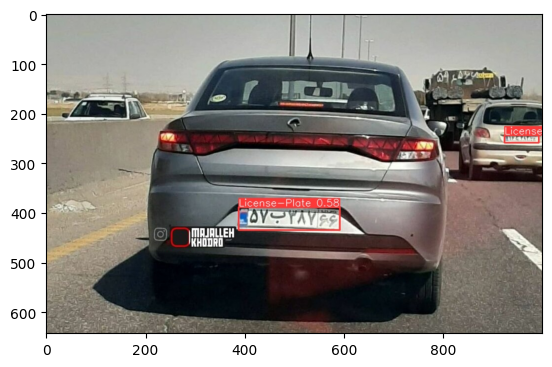

In [28]:
inference('test_1.jpg', new_model)


image 1/1 /content/test_2.jpg: 480x640 2 License-Plates, 74.4ms
Speed: 2.4ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


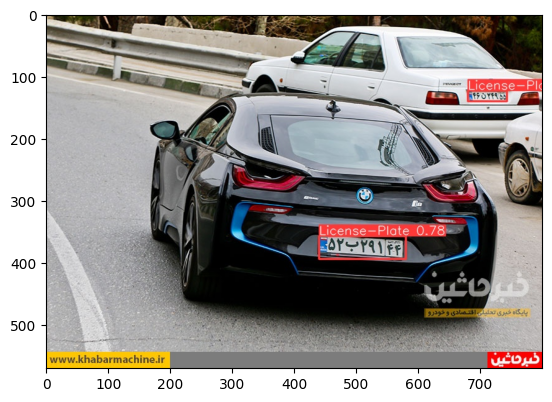

In [29]:
inference('test_2.jpg', new_model)